In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist

import numpy as np
from skimage import io

import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

In [4]:
#loading the dataset
(train_img, train_lab) , (test_img, test_lab) = fashion_mnist.load_data()

In [5]:
#train size
print(train_img.shape)
print(train_lab.shape)

#test size
print(test_img.shape)
print(test_lab.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
print(train_img[0].shape) #image size
print(train_lab[0].shape) #label
print(test_img[0].shape) #image size
print(test_lab[0].shape) #label

(28, 28)
()
(28, 28)
()


In [7]:
#unique classes in train
# set(train_lab) 

import pandas as pd

df = pd.DataFrame({'Labels': train_lab})
df.Labels.value_counts()
# plt.pie()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: Labels, dtype: int64

(28, 28)
2
40532


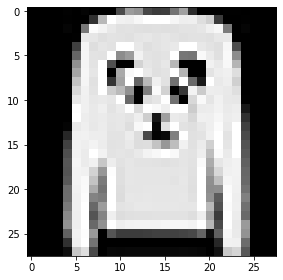

In [8]:
#let's view the image

index = np.random.randint(0,len(train_img))

print(train_img[index].shape)
print(train_lab[index])
print(index)
io.imshow(train_img[index])

In [9]:
# Since we have one channel images i.e. Black and white the dimensions of input to the Network must be (Z,x,y,1)
# Let's Reshape that

print(train_img.shape)
print(test_img.shape)
print('\n'+'-'*20+'\n')
X_train = train_img.reshape(train_img.shape[0],28,28,1)
#Same for test set also
X_test = test_img.reshape(test_img.shape[0],28,28,1)

#normalizing the images
X_train = X_train/255
X_test = X_test/255

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)

--------------------

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [10]:
#Similarly Lables must be reshaped 
print(train_lab)
print(train_lab.shape)
#test
print(test_lab)
print(test_lab.shape)

y_train = keras.utils.to_categorical(train_lab,10)
y_test = keras.utils.to_categorical(test_lab,10)
print('-'*20+'\nAfter One hot encoding of Lables :')
print(y_train.shape)
print(y_test.shape)

[9 0 0 ... 3 0 5]
(60000,)
[9 2 1 ... 8 1 5]
(10000,)
--------------------
After One hot encoding of Lables :
(60000, 10)
(10000, 10)


#### Model Building

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [11]:
model = Sequential([
                    Conv2D(16,kernel_size=(3,3), input_shape = (28,28,1), activation='relu',padding='same')
])

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                346176    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 351,626
Trainable params: 351,626
Non-trainable params: 

In [12]:

model.compile(optimizer='sgd',loss=keras.losses.categorical_crossentropy, metrics=[keras.metrics.categorical_accuracy])

model.fit(X_train,y_train,
          batch_size=32,epochs=10,verbose=1,class_weight=None,
          validation_data=(X_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 134s 2ms/step - loss: 0.7009 - categorical_accuracy: 0.7482 - val_loss: 0.5143 - val_categorical_accuracy: 0.8091
Epoch 2/10
60000/60000 [==============================] - 121s 2ms/step - loss: 0.4585 - categorical_accuracy: 0.8356 - val_loss: 0.4584 - val_categorical_accuracy: 0.8314
Epoch 3/10
60000/60000 [==============================] - 127s 2ms/step - loss: 0.3946 - categorical_accuracy: 0.8586 - val_loss: 0.3913 - val_categorical_accuracy: 0.8602
Epoch 4/10
60000/60000 [==============================] - 123s 2ms/step - loss: 0.3547 - categorical_accuracy: 0.8725 - val_loss: 0.3578 - val_categorical_accuracy: 0.8718
Epoch 5/10
60000/60000 [==============================] - 123s 2ms/step - loss: 0.3262 - categorical_accuracy: 0.8838 - val_loss: 0.3410 - val_categorical_accuracy: 0.8772
Epoch 6/10
60000/60000 [==================

In [15]:
#Let's try to decrease teh model parameters and see how it works

In [14]:
model = Sequential([
                    Conv2D(8,kernel_size=(3,3), input_shape = (28,28,1), activation='relu',padding='same')
])

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                50208     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 50,618
Trainable params: 50,618
Non-trainable params: 0
_________________________________________________________________


In [13]:
#name of model
filepath = 'model_epoch__{epoch:02d}-val_loss__{val_loss:.2f}-val_acc__{val_categorical_accuracy:.2f}.hdf5'
#early stpooing
early_stop = EarlyStopping(monitor='val_categorical_accuracy',patience=3)
#to save the model
model_save_checkpoint = ModelCheckpoint(filepath,monitor='val_loss',save_best_only=True,save_weights_only=False,verbose=1)
#model compilation
model.compile(optimizer='sgd',loss=keras.losses.categorical_crossentropy, metrics=[keras.metrics.categorical_accuracy])
#train
results = model.fit(X_train,y_train, callbacks=[model_save_checkpoint,early_stop],
          batch_size=32,epochs=20,verbose=1,class_weight=None,
          validation_data=(X_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 25s 418us/step - loss: 0.7298 - categorical_accuracy: 0.7455 - val_loss: 0.5309 - val_categorical_accuracy: 0.8110

Epoch 00001: val_loss improved from inf to 0.53093, saving model to model_epoch__01-val_loss__0.53-val_acc__0.81.hdf5
Epoch 2/20
60000/60000 [==============================] - 22s 366us/step - loss: 0.4794 - categorical_accuracy: 0.8301 - val_loss: 0.4582 - val_categorical_accuracy: 0.8350

Epoch 00002: val_loss improved from 0.53093 to 0.45823, saving model to model_epoch__02-val_loss__0.46-val_acc__0.83.hdf5
Epoch 3/20
60000/60000 [==============================] - 23s 379us/step - loss: 0.4291 - categorical_accuracy: 0.8484 - val_loss: 0.4351 - val_categorical_accuracy: 0.8431

Epoch 00003: val_loss improved from 0.45823 to 0.43507, saving model to model_epoch__03-val_loss__0.44-val_acc__0.84.hdf5
Epoch 4/20
60000/6

In [69]:
# 19th epoch model
# train 90 and test 89

In [82]:
final_model = keras.models.load_model('model_epoch__19-val_loss__0.30-val_acc__0.89.hdf5')

def show_random_examples(x, y, p):
    indices = np.random.choice(range(x.shape[0]), 10)
    
    x = x[indices]
    y = y[indices]
    p = p[indices]
    
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, 1 + i)
        plt. imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        
        col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
        plt.xlabel('Indicator', color = col)
    plt.show()


In [74]:
y_test_pred = final_model.predict_classes(X_test)

In [90]:
# print(len(test_lab))
# print(len(y_test_pred))

# y_test_pred

In [91]:
import sklearn.metrics
print(sklearn.metrics.accuracy_score(test_lab,y_test_pred))

final_model.evaluate(X_test,y_test)

0.8906
10000/10000 [==============================] - 4s 362us/sample - loss: 0.3024 - categorical_accuracy: 0.8906


[0.30236323747634886, 0.8906]

In [92]:
final_model.metrics_names

['loss', 'categorical_accuracy']

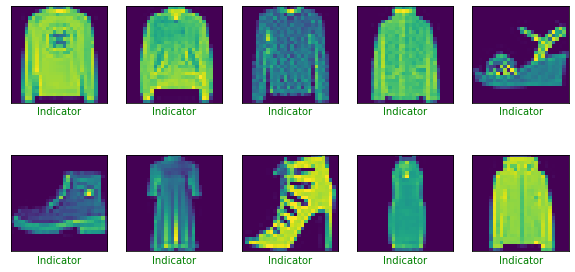

In [93]:
show_random_examples(test_img,test_lab,y_test_pred)